In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [38]:
df = pd.read_csv("insurance.csv") #https://www.kaggle.com/code/rpsuraj/outlier-detection-techniques-simplified/input?select=insurance.csv
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [15]:
df.shape

(1338, 7)

In [16]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


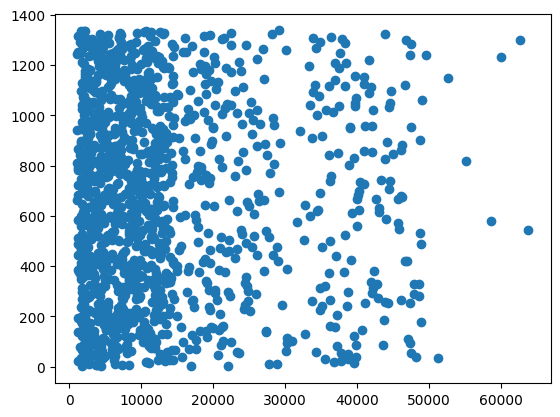

In [18]:
y = np.arange(1, 1339) 
plt.scatter(df["charges"], y) #it is a way to graphcally plot a dataset or any part of the dataset, there will be a separate jupyter notebook regarding this
plt.xlabel = "charges"
plt.show()

(92, 7)


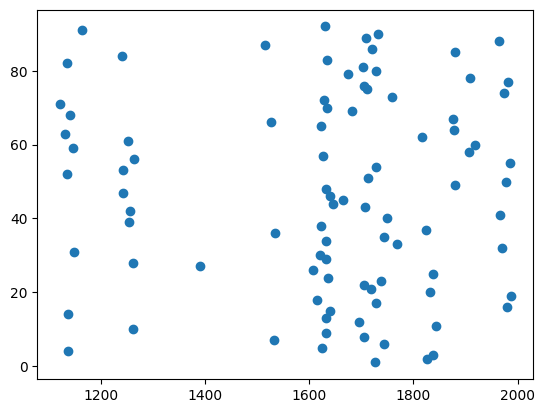

In [19]:
df_sample = df.loc[df["charges"] < 2000, "age":"charges"]
print(df_sample.shape)

y = np.arange(1, 93) #by knowing the size of our df_sample, we make an array from 1 to 93 because there are 92 indexes(rows) in df_sample

plt.scatter(df_sample["charges"], y) #it is a way to graphcally plot a dataset or any part of the dataset, there will be a separate jupyter notebook regarding this
plt.xlabel = "charges"
plt.show()

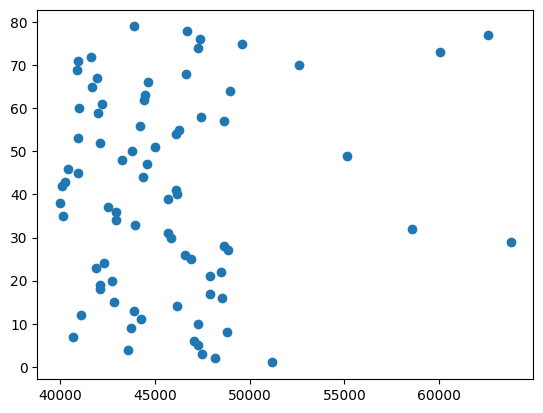

In [20]:
df_sample = df.loc[df["charges"] > 40000, "age":"charges"]

y = np.arange(1, df_sample.shape[0]+1) 

plt.scatter(df_sample["charges"], y) #it is a way to graphcally plot a dataset or any part of the dataset, there will be a separate jupyter notebook regarding this
plt.xlabel = "charges"
plt.show()

So, we can say we don't have any outliers in starting, we have outliers around after 50000.

In [21]:
thresold_max = float(df.charges.quantile([0.99])) #the values of quantile are most important for overall results and you should know the basics of the quantile for values to set 
print(thresold_max)
print(type(thresold_max))

48537.480726
<class 'float'>


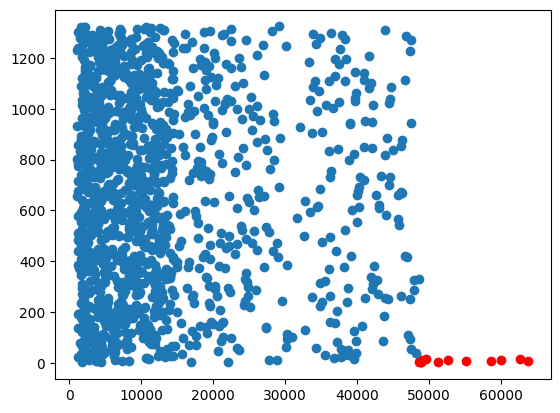

In [28]:
df_temp = df.loc[df["charges"] > 48537, "age":"charges"] 
df_temp2 = df.loc[df["charges"] < 48537, "age":"charges"]
y = np.arange(1, df_temp2.shape[0]+1) 
y2 = np.arange(1, df_temp.shape[0]+1) 
plt.scatter(df_temp["charges"], y2, color = "red")
plt.scatter(df_temp2["charges"], y)
plt.xlabel = "Charges"
plt.show()

In [29]:
df2 = df.loc[df["charges"] < thresold_max, "age":"charges"]
df2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [30]:
df2.shape

(1324, 7)

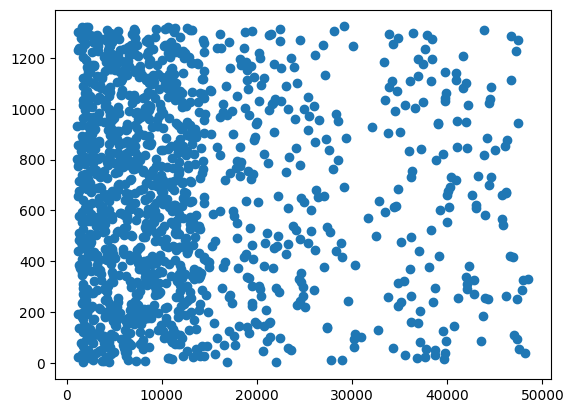

In [31]:
y = np.arange(1, df2.shape[0]+1) 
plt.scatter(df2["charges"], y)
plt.xlabel = "Charges"
plt.show()

In [32]:
df2.bmi.describe()

count    1324.000000
mean       30.585400
std         6.067911
min        15.960000
25%        26.220000
50%        30.275000
75%        34.443750
max        53.130000
Name: bmi, dtype: float64

(1324, 7)


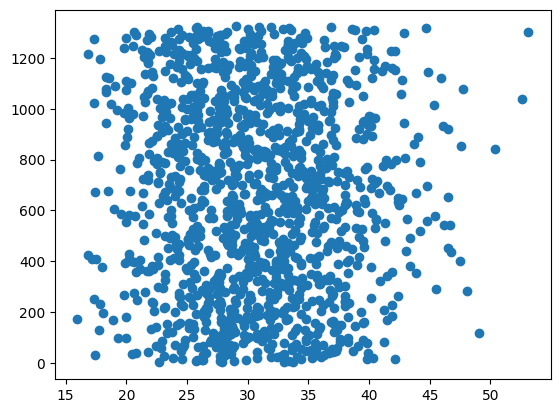

In [33]:
print(df2.shape)
y = np.arange(1, df2.shape[0]+1) 
plt.scatter(df2["bmi"], y) 
plt.xlabel = "bmi"
plt.show()

In [34]:
thresold_max = float(df2.bmi.quantile([0.998])) 
print(thresold_max)

49.527280000000054


In [35]:
thresold_max
df3 = df2[(df2.bmi<thresold_max)] #can also use loc
df3

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [36]:
df3.shape

(1321, 7)

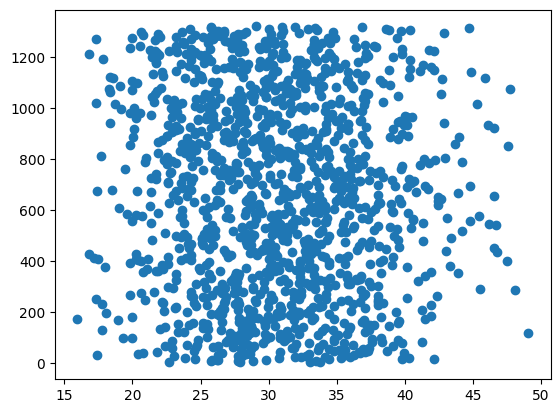

In [37]:
y = np.arange(1, df3.shape[0]+1) 
plt.scatter(df3["bmi"], y)
plt.xlabel = "bmi"
plt.show()